# Kaggle Digit Recognizer

Code note book for https://www.kaggle.com/competitions/digit-recognizer/overview


In [21]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Normalization
from keras.layers import Conv2D
from keras.layers import MaxPooling2D 
from keras.layers import Flatten
from keras.layers import Dropout 
import numpy as np
import pandas as pd
import csv

Explore data

In [31]:
digits_train = pd.read_csv(
    "train.csv")
  
digits_train = digits_train.values

x_train = digits_train.copy()
print(x_train.shape)
y_train = x_train[:, 0]
print(x_train.shape)
print(y_train.shape)

x_train = x_train[:, :-1].reshape(-1, 28, 28, 1)
input_shape = (28, 28, 1)
x_train = x_train.astype('float32')

x_train = x_train / 255.
print(x_train.shape)

(42000, 785)
(42000, 785)
(42000,)
(42000, 28, 28, 1)


In [20]:

print(x_train.shape)
print(y_train.shape)



(42000, 28, 28, 1)
(42000,)


Explore digits in matplot

1


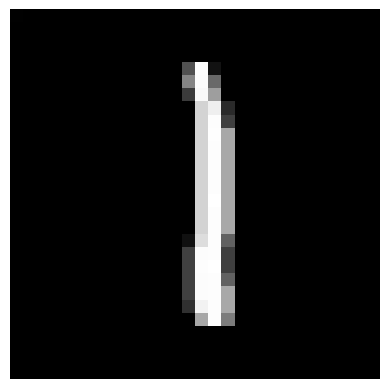

In [32]:
# for i in range(5):
i = 1000
print(y_train[i])
reshape = pd.DataFrame(x_train[i].reshape(28, 28))
plt.imshow(reshape, cmap='gray')
plt.axis('off')
plt.show()

Build NN

In [33]:

model = Sequential([
Conv2D(28, kernel_size=(3,3), input_shape=input_shape),
MaxPooling2D(pool_size=(2, 2)),
Flatten(),
Dense(128, activation=tf.nn.relu),
Dropout(0.2),
Dense(10,activation=tf.nn.softmax)])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 28)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4732)              0         
                                                                 
 dense_11 (Dense)            (None, 128)               605824    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 10)                1290      
                                                      

In [34]:
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

In [36]:
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1313/1313 [==============================] - 31s 23ms/step - loss: 0.0311 - accuracy: 0.9897
Epoch 2/10
1313/1313 [==============================] - 29s 22ms/step - loss: 0.0247 - accuracy: 0.9918
Epoch 3/10
1313/1313 [==============================] - 29s 22ms/step - loss: 0.0234 - accuracy: 0.9916
Epoch 4/10
1313/1313 [==============================] - 30s 23ms/step - loss: 0.0230 - accuracy: 0.9920
Epoch 5/10
1313/1313 [==============================] - 29s 22ms/step - loss: 0.0167 - accuracy: 0.9943
Epoch 6/10
1313/1313 [==============================] - 29s 22ms/step - loss: 0.0163 - accuracy: 0.9947
Epoch 7/10
1313/1313 [==============================] - 29s 22ms/step - loss: 0.0150 - accuracy: 0.9947
Epoch 8/10
1313/1313 [==============================] - 29s 22ms/step - loss: 0.0149 - accuracy: 0.9949
Epoch 9/10
1313/1313 [==============================] - 30s 23ms/step - loss: 0.0120 - accuracy: 0.9961
Epoch 10/10
1313/1313 [==============================] - 32s 24m

Predictions for test data

In [37]:
x_test = pd.read_csv("test.csv")

print(x_test.shape)

x_test = x_test.values

x_test = x_test.reshape(-1, 28, 28, 1)

y_test = model.predict(x_test)

y_pred = y_test.argmax(axis=-1)



(28000, 784)
875/875 [==============================] - 6s 6ms/step


In [38]:
y_pred[:10]
y_test[:10]

array([[0.        , 0.        , 0.99999994, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.99999994, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.99999994],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.99999994],
       [0.        , 0.        , 0.        , 0.99999994, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.99999994, 0.        , 0.        ],
       [0.99999994, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       

Store to CSV

In [39]:
with open('predictions.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['ImageId','Label'])
    for i in range(y_pred.size):
        writer.writerow([i + 1, y_pred[i]])